In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata.head()
# Combine the data into a single DataFrame
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [124]:
# Checking the number of mice.
mice_number = len(combined_data['Mouse ID'].unique())
print(mice_number)

249


In [125]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID','Timepoint'], keep=False)]
duplicate_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [126]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice['Mouse ID'])]

# Display all data for the duplicate mice
all_duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [127]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.drop_duplicates(subset=['Mouse ID','Timepoint',], keep='last')
clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [128]:
# Checking the number of mice in the clean DataFrame.
mice_number = len(combined_data['Mouse ID'].unique())
print(mice_number)

249


In [129]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

grouped_data = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)']

mean_values = grouped_data.mean()

median_values = grouped_data.median()

variance_values = grouped_data.var()

std_values = grouped_data.std()

sem_values = grouped_data.sem()

summary_statistics = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Variance': variance_values,
    'Standard Deviation': std_values,
    'SEM': sem_values
})

summary_statistics


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [130]:
# It seems that it doesn't make sense if data from diffrent timepoints is caculated all together.
# So I also groupby another one with timepoints
# Group the data by both "Drug Regimen" and "Timepoint"
grouped_data = clean_data.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)']

# Calculate the mean for each drug regimen at different timepoints
mean_values = grouped_data.mean()

# Calculate the median for each drug regimen at different timepoints
median_values = grouped_data.median()

# Calculate the variance for each drug regimen at different timepoints
variance_values = grouped_data.var()

# Calculate the standard deviation for each drug regimen at different timepoints
std_values = grouped_data.std()

# Calculate the standard error of the mean (SEM) for each drug regimen at different timepoints
sem_values = grouped_data.sem()

# Create a summary statistics DataFrame
summary_statistics = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Variance': variance_values,
    'Standard Deviation': std_values,
    'SEM': sem_values
})

# Display the summary statistics table
summary_statistics


Mean     Median   Variance  Standard Deviation  \
Drug Regimen Timepoint                                                        
Capomulin    0          45.000000  45.000000   0.000000            0.000000   
             5          44.266086  45.597064   5.030889            2.242964   
             10         43.084291  43.421014  12.344133            3.513422   
             15         42.064317  42.798160  16.878693            4.108369   
             20         40.716325  40.716428  19.035028            4.362915   
...                           ...        ...        ...                 ...   
Zoniferol    25         55.432935  55.676604   5.808348            2.410052   
             30         57.713531  57.419744   9.601024            3.098552   
             35         60.089372  60.365832  10.876760            3.297993   
             40         62.916692  62.274543  13.958456            3.736102   
             45         65.960888  65.684689  14.100301            3.755037   

                             SEM  
Drug Regimen Timepoint            
Capomulin    0          0.000000  
             5          0.448593  
             10         0.702684  
             15         0.838617  
             20         0.909731  
...                          ...  
Zoniferol    25         0.602513  
             30         0.800043  
             35         0.881426  
             40         0.998515  
             45         1.003576  

[100 rows x 5 columns]

In [131]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics = clean_data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_statistics

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [132]:
# Group the data by both "Drug Regimen" and "Timepoint" and calculate multiple summary statistics using agg()
summary_statistics = clean_data.groupby(['Drug Regimen', 'Timepoint'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Display the summary statistics table
summary_statistics


mean     median        var       std       sem
Drug Regimen Timepoint                                                     
Capomulin    0          45.000000  45.000000   0.000000  0.000000  0.000000
             5          44.266086  45.597064   5.030889  2.242964  0.448593
             10         43.084291  43.421014  12.344133  3.513422  0.702684
             15         42.064317  42.798160  16.878693  4.108369  0.838617
             20         40.716325  40.716428  19.035028  4.362915  0.909731
...                           ...        ...        ...       ...       ...
Zoniferol    25         55.432935  55.676604   5.808348  2.410052  0.602513
             30         57.713531  57.419744   9.601024  3.098552  0.800043
             35         60.089372  60.365832  10.876760  3.297993  0.881426
             40         62.916692  62.274543  13.958456  3.736102  0.998515
             45         65.960888  65.684689  14.100301  3.755037  1.003576

[100 rows x 5 columns]

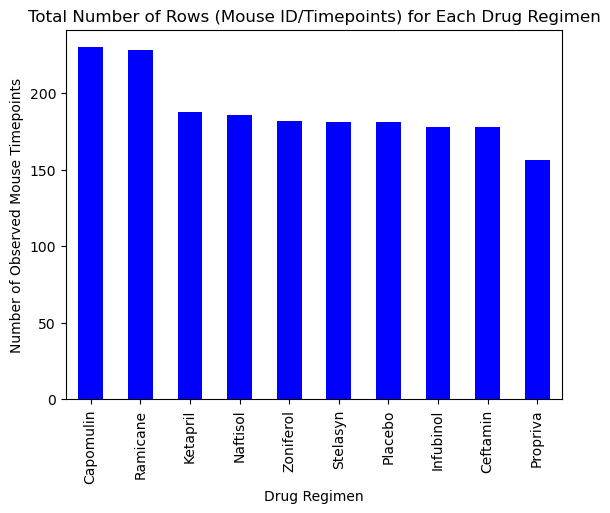

In [133]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the occurrences of each drug regimen in the DataFrame
drug_counts = clean_data['Drug Regimen'].value_counts()

# Generate a bar plot
drug_counts.plot(kind='bar', color='blue')

# Add labels and title to the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')

# Display the plot
plt.show()



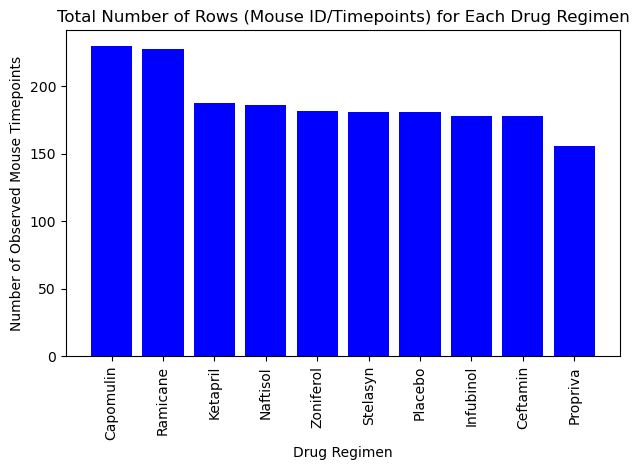

In [134]:
# Get the drug regimens and their corresponding counts
drug_regimens = drug_counts.index
counts = drug_counts.values

# Create the bar plot
plt.bar(drug_regimens, counts, color='blue')

# Add labels and title to the plot
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')
plt.xticks(rotation=90, ha='center')
# Display the plot
plt.tight_layout()
plt.show()

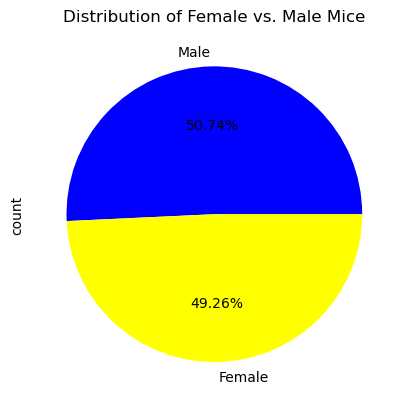

In [135]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the occurrences of each gender in the DataFrame
gender_counts = clean_data['Sex'].value_counts()

# Generate a pie plot
gender_counts.plot(kind='pie', autopct='%1.2f%%', colors=['blue', 'yellow'])

# Add a title to the plot
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.show()


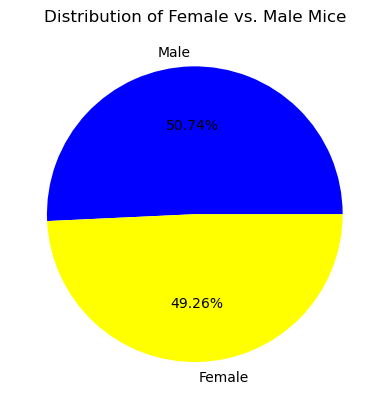

In [136]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = clean_data['Sex'].value_counts()
genders = gender_counts.index
plt.pie(gender_counts,labels=genders, autopct='%1.2f%%', colors=['blue', 'yellow'])
plt.title('Distribution of Female vs. Male Mice')

plt.show()

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = combined_data.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints, combined_data, on=['Mouse ID', 'Timepoint'])

# Filter to include only the treatment regimens Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [138]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = final_tumor_volume['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    # add subset 
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    median_q = quartiles[0.5]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]

    tumor_vol.append(treatment_data.to_list())

Text(0, 0.5, 'Final Tumor Volume(mm3)')

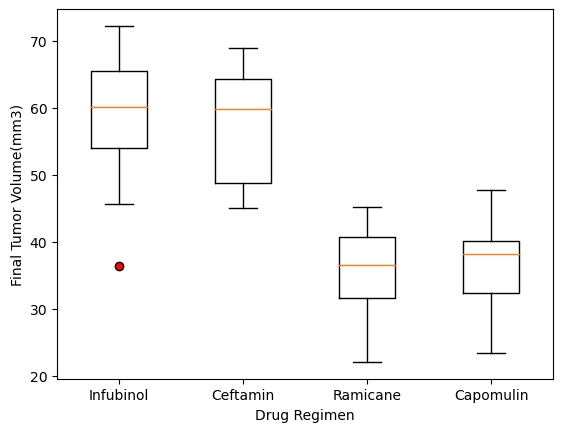

In [139]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol, labels=treatments, flierprops=dict(markerfacecolor='red'))
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume(mm3)')


In [140]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the clean_data DataFrame for Capomulin and group by Timepoint
capomulin_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin')]
capomulin_data.head(20)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


Text(0.5, 1.0, 'Capomulin Treatment for Mouse b128')

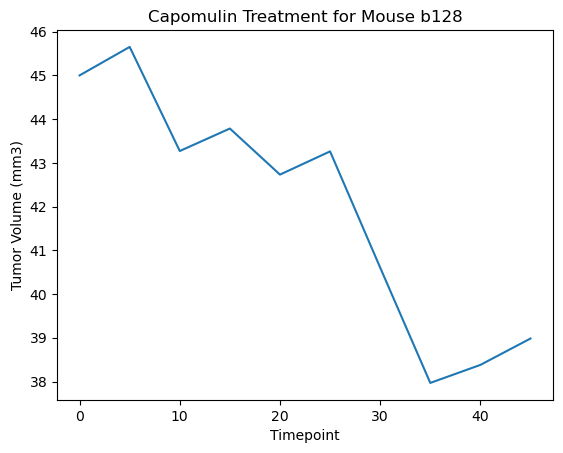

In [141]:
# chose mouse b128 to make a line plot of tumor volume vs. time point
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == 'b128']
plt.plot(mouse_data['Timepoint'],mouse_data['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin Treatment for Mouse b128')


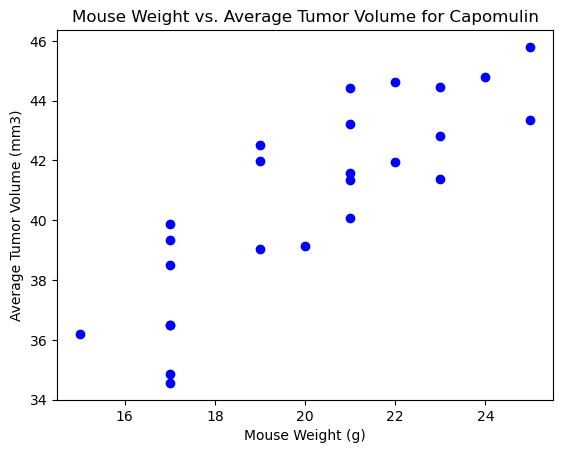

In [142]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Calculate the average observed tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Get the mouse weight for each mouse in the Capomulin regimen
mouse_weight = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create the scatter plot
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='blue')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin')

plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

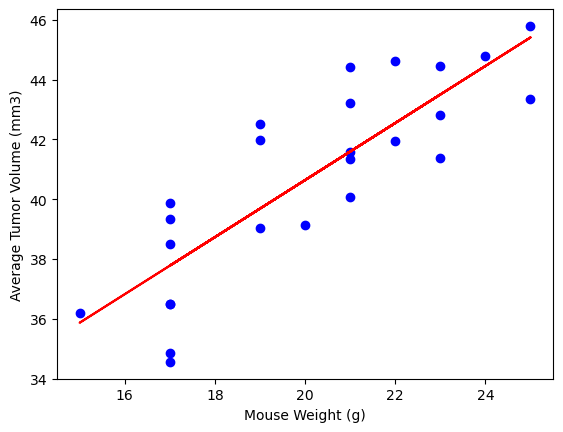

In [143]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient = mouse_weight.corr(average_tumor_volume)
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)
plt.scatter(mouse_weight, average_tumor_volume, marker='o', color='blue')
plt.plot(mouse_weight, slope * mouse_weight + intercept, color='red', label='Regression Line')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')